# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

## Loading the dataset

In [2]:
data = pd.read_csv('used_device_data.csv')

In [3]:
data

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


### Observation
The Dataset has 15 columns as mentioned in the Data Dictionary

In [4]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [7]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [5]:
data.shape

(3454, 15)

### Observation On Shape
The data has 3454 rows and 15 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Observation on Info
The data has 4 object, 9 float and 2 integers 

In [6]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


### Observation on Description
The data have minimium normalized new price of 4.79, maximium normalized new price of 7.84 and mean of 5.23

In [7]:
data.duplicated(subset = None, keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Obeservation on Missing values
There are alot of missing values in main_camera and few in selfie_camera_mp, int_memory,ram, battery and weight

In [9]:
data = data.copy()

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [5]:

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True, 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  

In [6]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

normalized _used_price

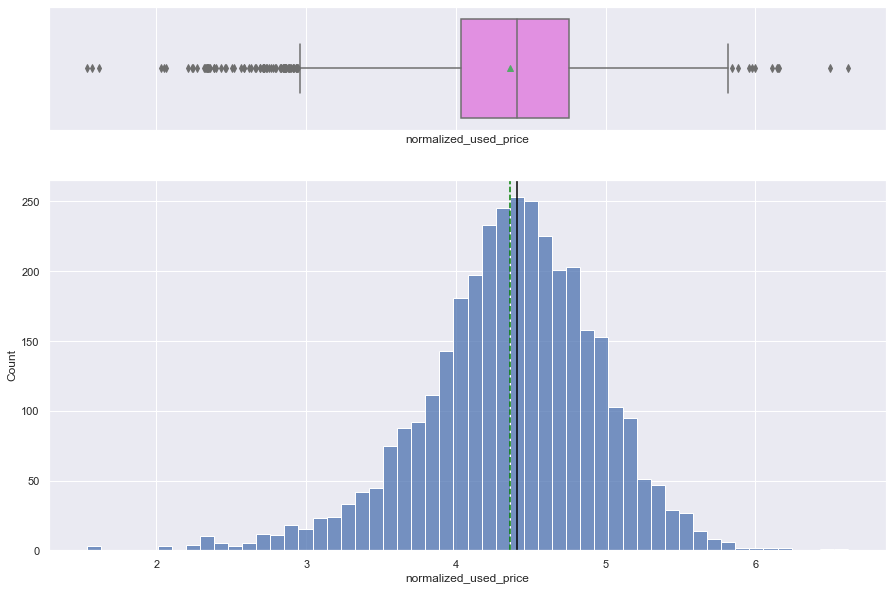

In [12]:
histogram_boxplot(data, 'normalized_used_price')


### Obsevation 
There are a lot of outliers on each side

normalized_new_price

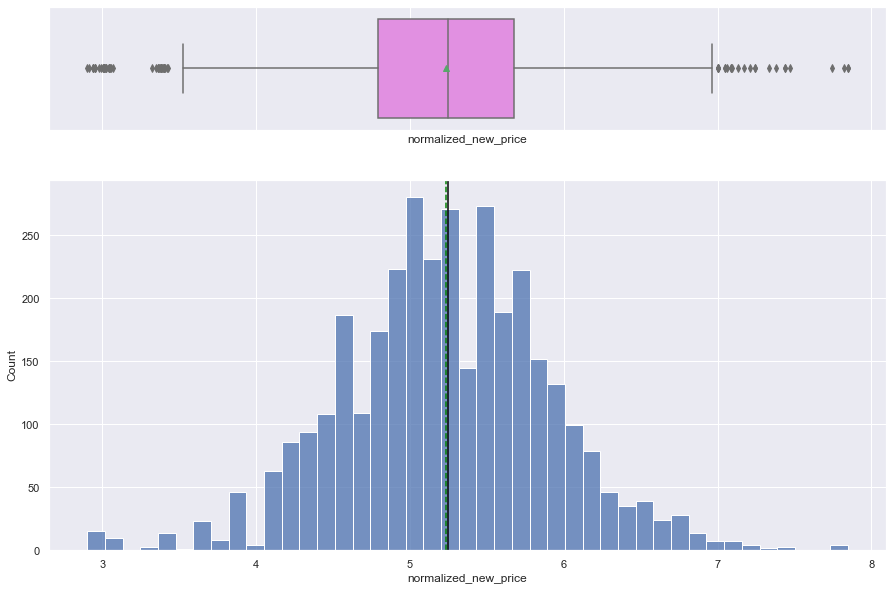

In [13]:
histogram_boxplot(data, 'normalized_new_price')

screen_size

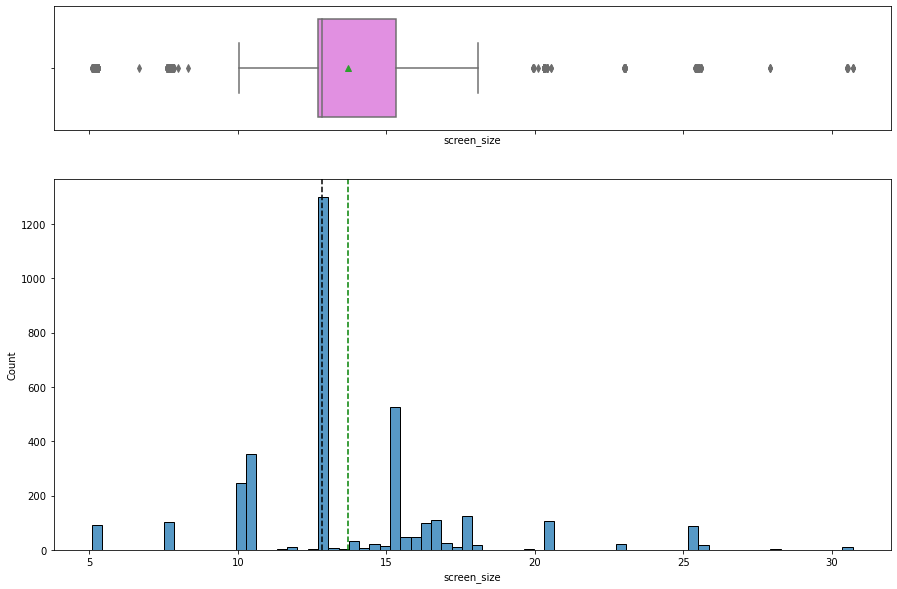

In [19]:
histogram_boxplot(data, 'screen_size')

main_camera_mp

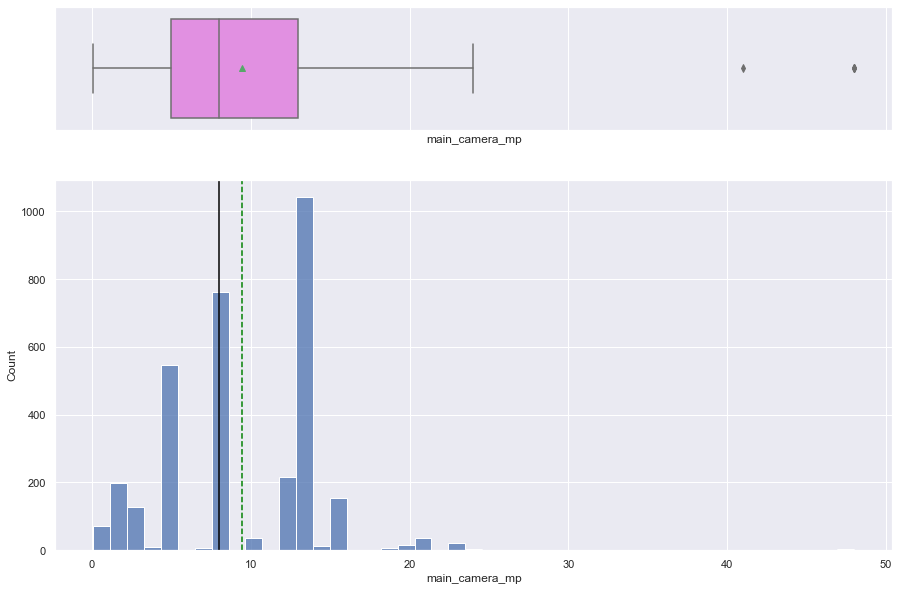

In [14]:
histogram_boxplot(data, 'main_camera_mp')

selfie_camera_mp

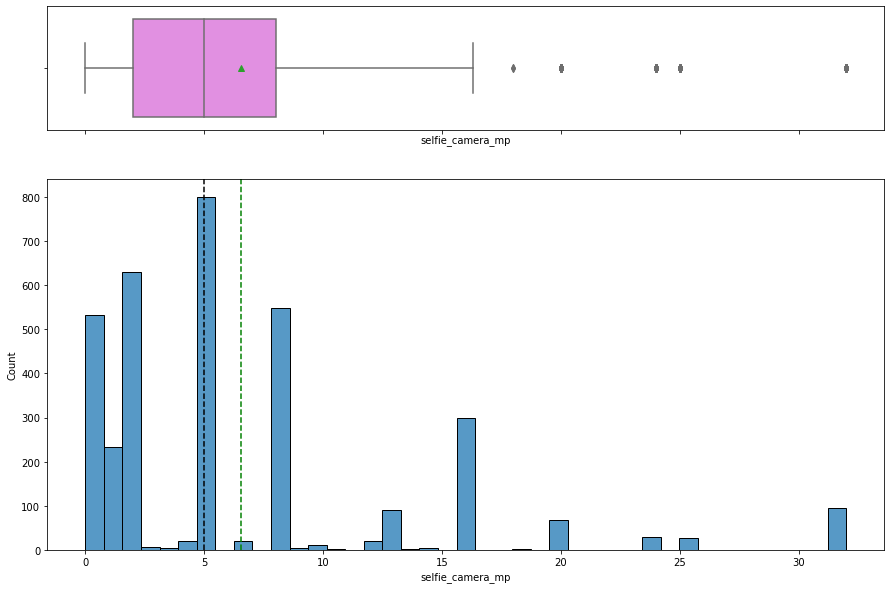

In [21]:
histogram_boxplot(data, 'selfie_camera_mp')

### Observation
There are about 5 outliers for selfie_camera_mp

int_memory

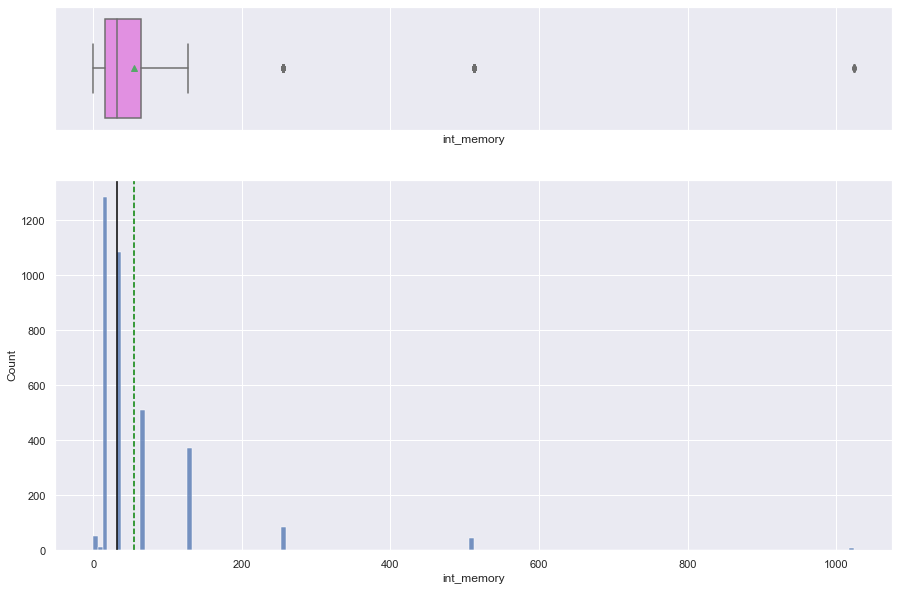

In [57]:
histogram_boxplot(data, 'int_memory')

### Observation
There are 3 outliers which are far away from each other

ram

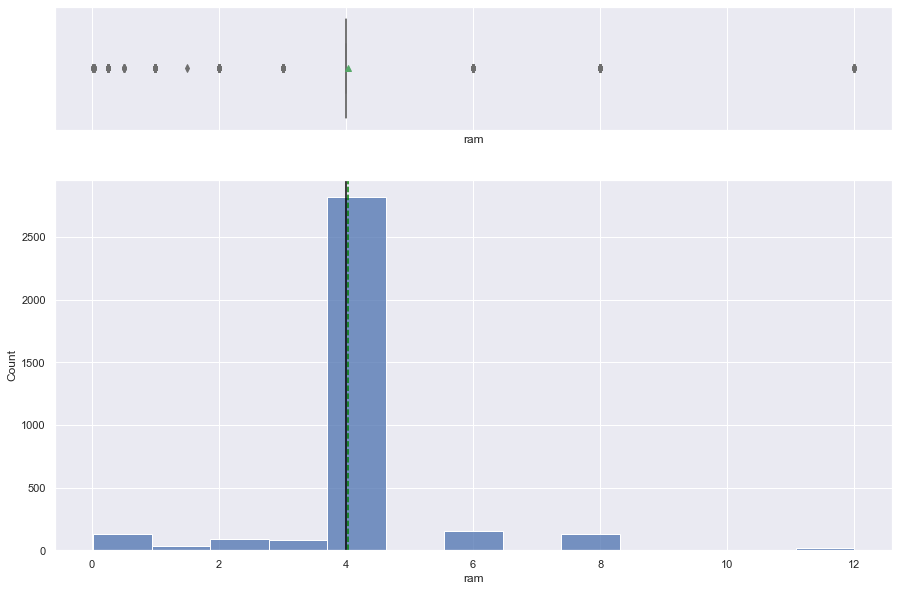

In [16]:
histogram_boxplot(data, 'ram')

### Observation in Ram
There are too many outliers in ram

### weight

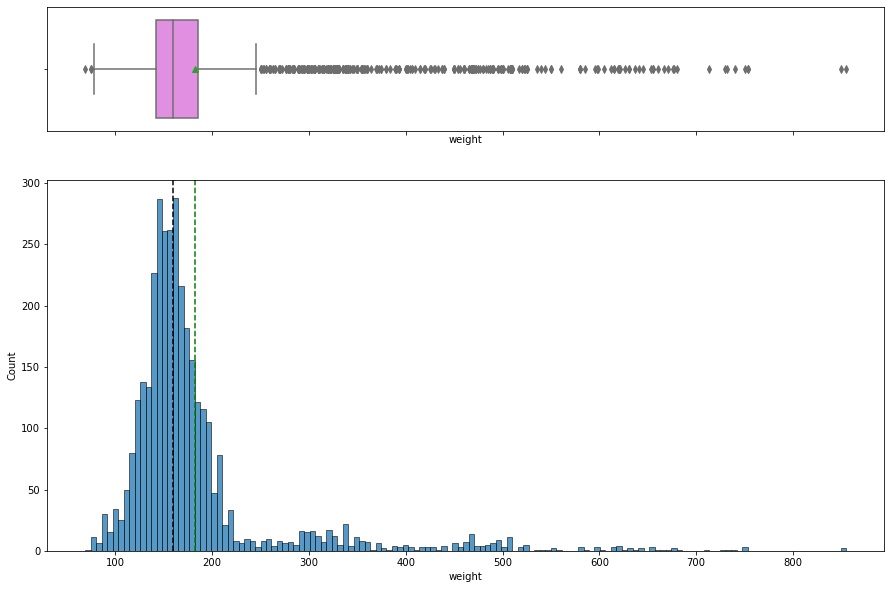

In [24]:
histogram_boxplot(data, 'weight')

### Observation on Weight
The weight has too many outliers

### Battery

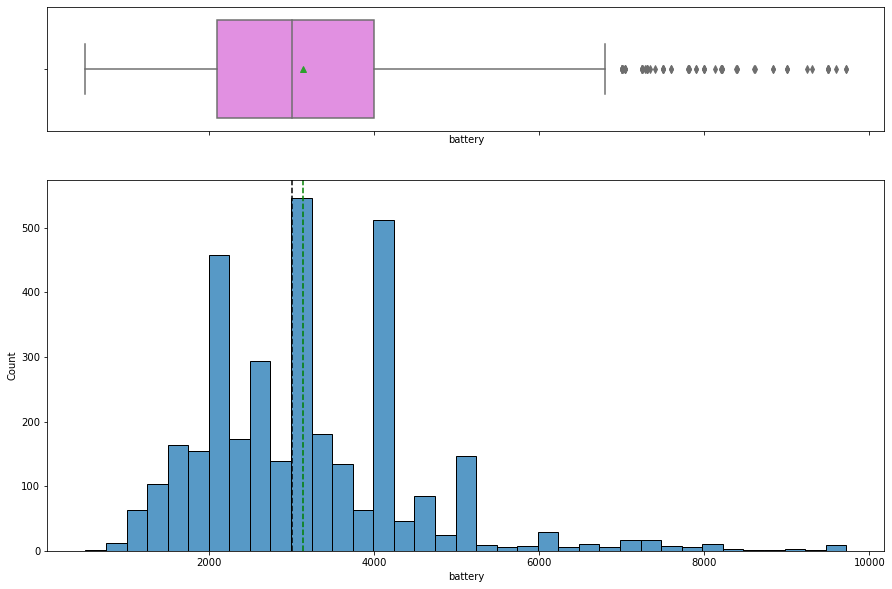

In [25]:
histogram_boxplot(data, 'battery')

### Obeservation
The battery has a lot of outliers 

### Days Used


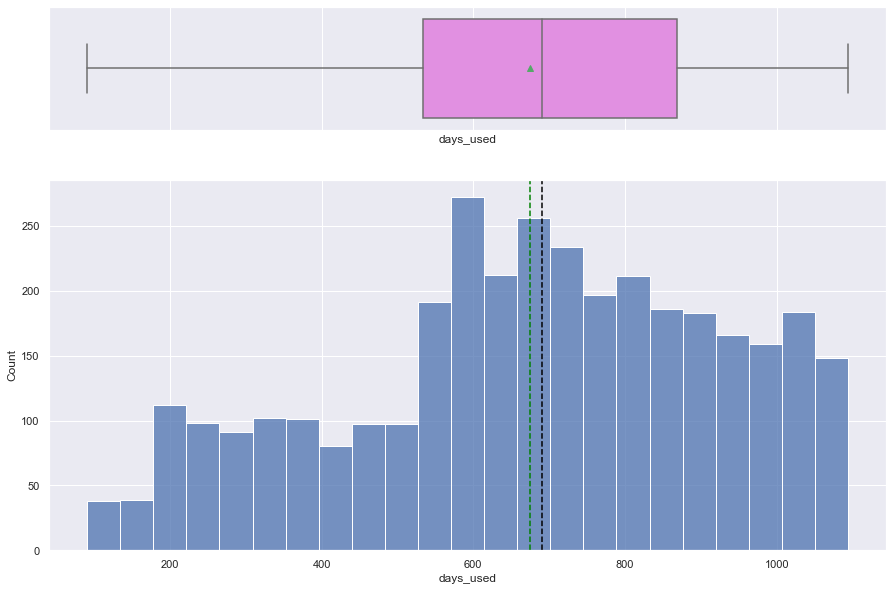

In [28]:
histogram_boxplot(data, 'days_used')

### Brand Name

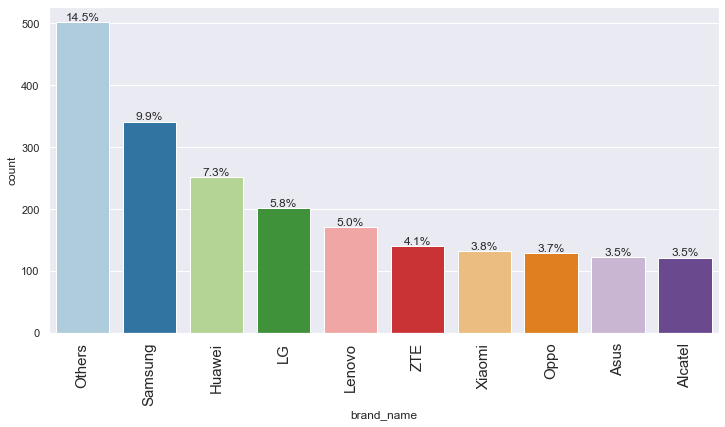

In [40]:
labeled_barplot(data, 'brand_name', perc=True, n=10)

### Observation on Brand Name
It can be seen that, others phone has about 500 count followed by samsung about 350 count and Alcatel and Asus which has lowest count a little about 100

### OS

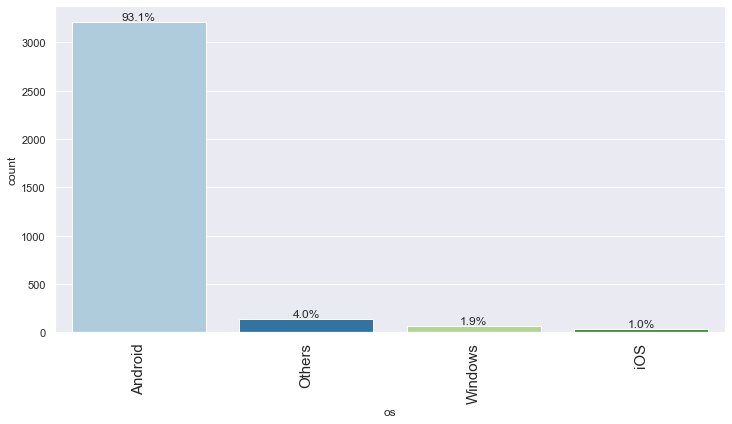

In [41]:
labeled_barplot (data, 'os', perc = True, n = 10)

### Obeservation on OS
Android has the highest OS usage which is a bit above 3000 count and IOS has the lowest which is less than 200 count.

### 4G

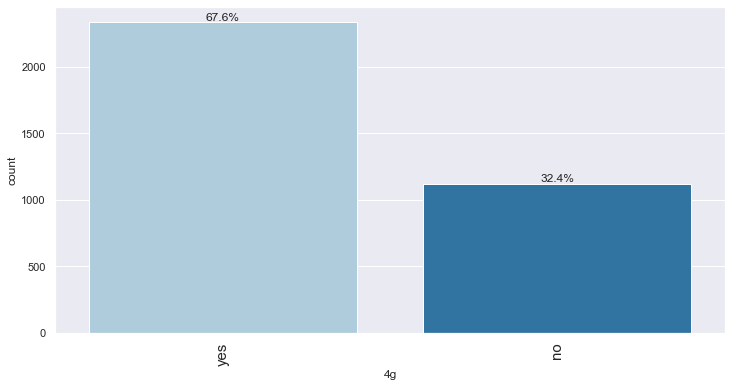

In [43]:
labeled_barplot(data, '4g', perc = True, n = 10)

### 0bservation on 4G
Those who uses the 4g have higher count which is more than 2000 whiles those who does not uses 4g have a bit higher than 1000 count.

### 5G

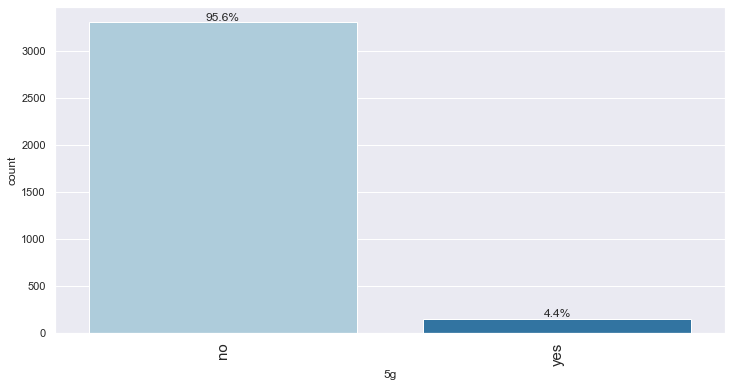

In [44]:
labeled_barplot(data, '5g', perc = True, n = 10)

### Observation on 5g
Majorit of uses does not like the 5g that is About 95.6% does not whiles about 4.4% uses 5g

### Release Year

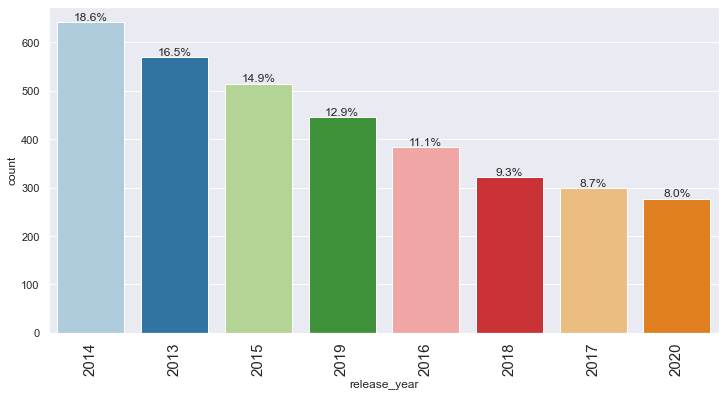

In [46]:
labeled_barplot(data, 'release_year', perc = True, n = 10)

### Observation on Release Year
In 2014 has the highest usage of 18.6 count and 2020 has he lowest count 8.0%

## Bivariate Analysis

### Correlation Check

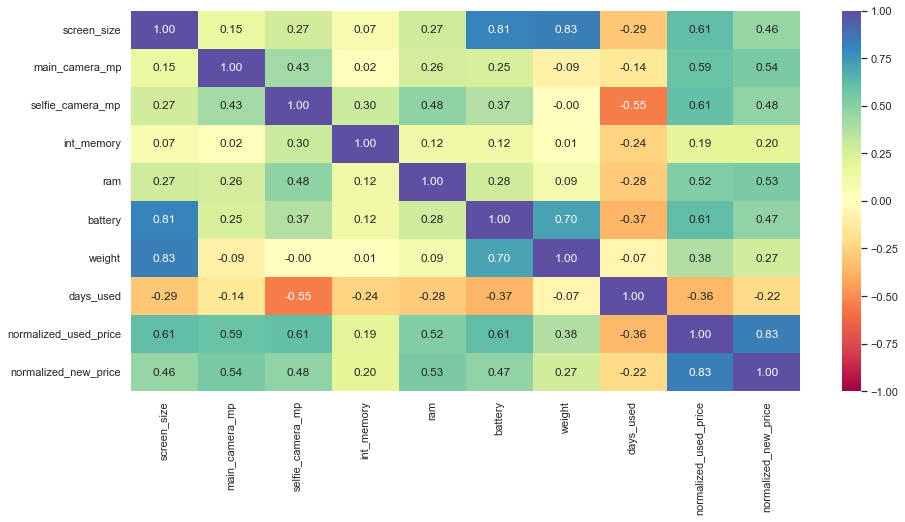

In [7]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


### Q1. What does the distribution of normalized used device prices look like?

<Figure size 1224x432 with 0 Axes>

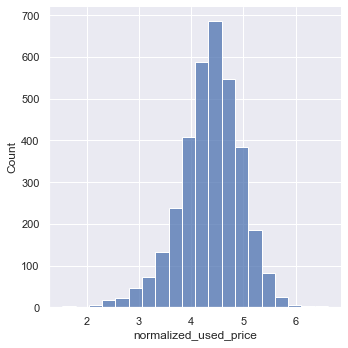

In [64]:
plt.figure(figsize=(17,6))
sns.displot(data, x = 'normalized_used_price', bins = 20)

In [ ]:
### Observation
The normalized used price has a bell shape structure. having the median around 4.5

### Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

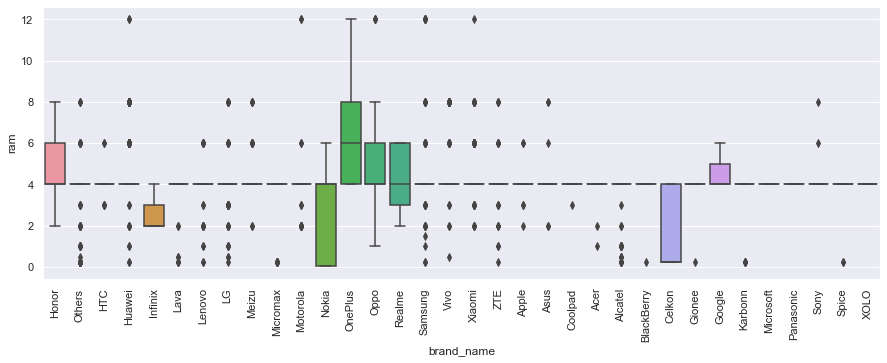

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data = data, x = 'brand_name', y = 'ram')
plt.xticks(rotation = 90)
plt.show()

### Observation
It can be seen that Honor, OnePlus, Oppo, Realme and Google has it Ram size on average above 4. Most of them are outliers spread accross and Influx, Nokia, Celkon has it Ram size below the mean size

### Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [13]:
df_large_battery = data[data.battery > 4500]
df_large_battery.shape

(341, 15)

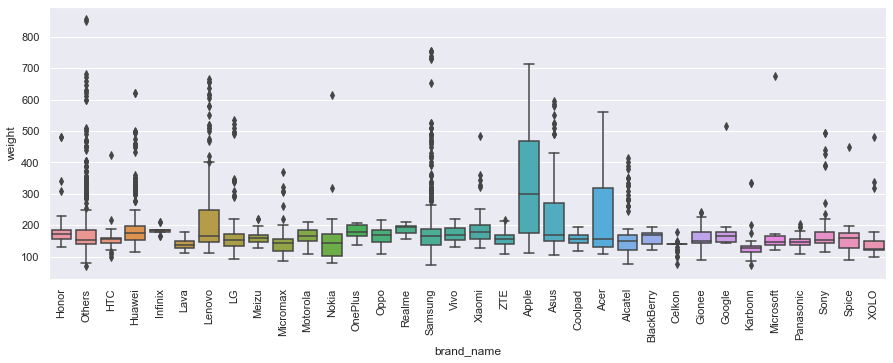

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data= data, x='brand_name', y = 'weight')
plt.xticks(rotation = 90)
plt.show()

### Observation
We see that with the exception of Apple and Acer which battery weight is more than 300

### Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [45]:
df_large_screen = data[data.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

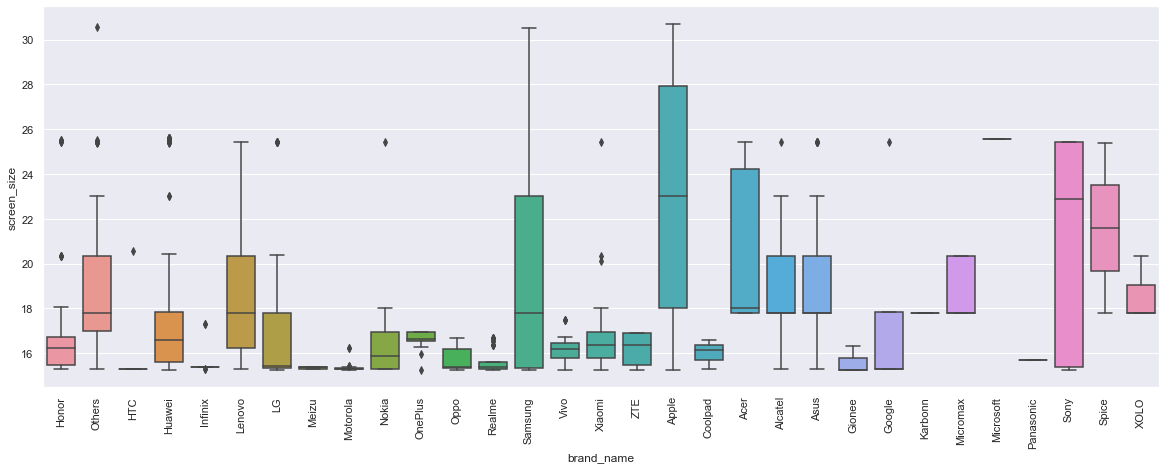

In [47]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df_large_screen, y = 'screen_size', x = 'brand_name')
plt.xticks(rotation = 'vertical')
plt.show()

### Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [61]:
df_large_selfie_camera = data[data.selfie_camera_mp > 8]
df_large_selfie_camera.shape

(655, 15)

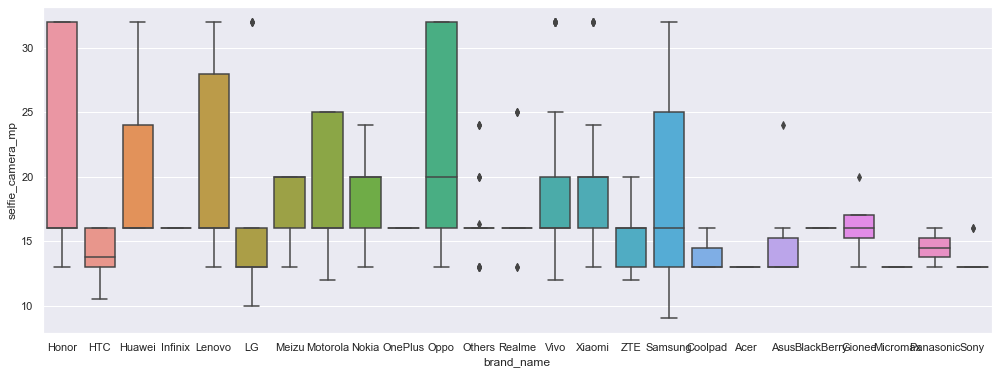

In [63]:
plt.figure(figsize=(17,6))
sns.boxplot(data= df_large_selfie_camera, x = 'brand_name',y = 'selfie_camera_mp' )
plt.show()

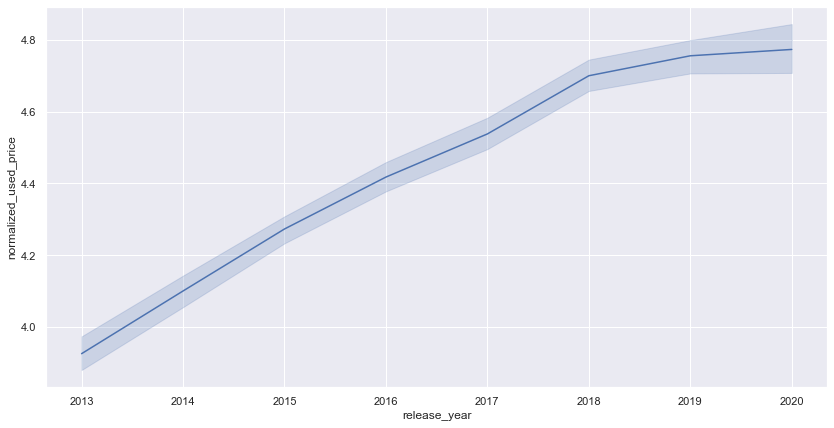

In [34]:
plt.figure(figsize=(14,7))
sns.lineplot(data = data, x = 'release_year', y = 'normalized_used_price')
plt.show()

Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.

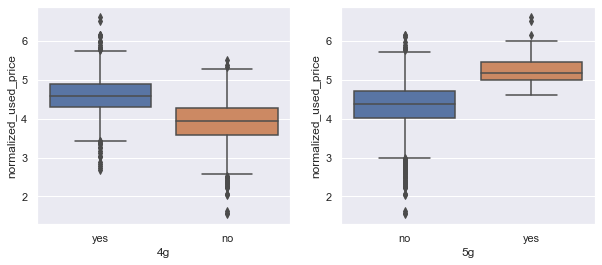

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.boxplot(data = data, x='4g', y = 'normalized_used_price')

plt.subplot(122)
sns.boxplot(data = data, x = '5g', y = 'normalized_used_price')

plt.show()

## Data Preprocessing

### Treating Missing Values

In [14]:
df1 = data.copy()

In [15]:
df1.int_memory.fillna('other', inplace = True)

In [16]:
column_name = ['main_camera_mp',
              'selfie_camera_mp',
              'battery',
              'weight',
              'ram'
]
for col in column_name:
    df1[col] = df1[col].fillna(
        value = df1.groupby(['int_memory'])[col].transform('median')
)
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [22]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(
    value = df1.groupby(['int_memory'])['main_camera_mp'].transform('median'))

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## Feature engineering 

 * we will create a new column as years_since_released from release_year_column
 * we will use 2021 as the baseline for data collection

### Outlier detection and treatment

In [17]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

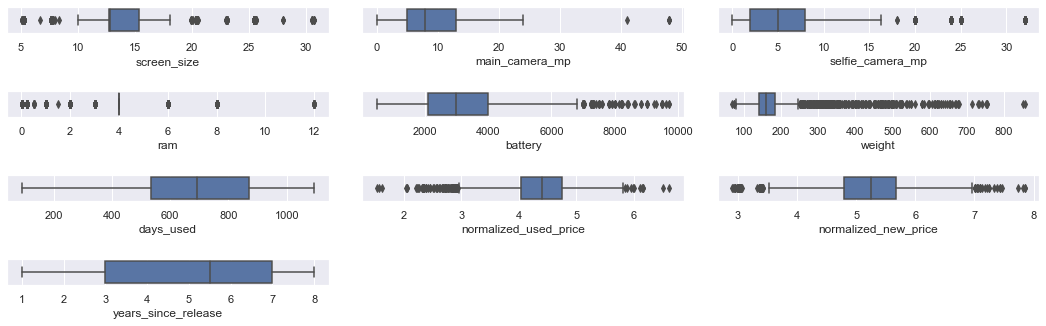

In [18]:
out_cols = df1.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize=(15,5))
for i, variable in enumerate(out_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data = df1, x = variable)
    plt.tight_layout(pad = 2)
    
plt.show()

### Observation outliers and treating them
* We see some outliers on all the columns except year since release and days used
* Most of the outliers are placed at both ends of the data

### Preparing Data for Modeling

In [19]:
x = df1.drop(['normalized_used_price'], axis = 1)
y = df1['normalized_used_price']

print(x.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp int_memory  ram  battery  weight  days_used  \
0               5.0       64.0  3.0   3020.0   146.0        127   
1              16.0      128.0  8.0   4300.0   213.0        325   
2               8.0      128.0  8.0   4200.0   213.0        162   
3               8.0       64.0  6.0   7250.0   480.0        345   
4               8.0       64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961 

In [26]:
# we adding the intercept

n = sm.add_constant(x)

In [29]:
x = pd.get_dummies(
    x,
    columns = x. select_dtypes(include = ['object','category']). columns.tolist(),
    drop_first = True,
)

x.head()

,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,weight,days_used,normalized_new_price,years_since_release,brand_name_Alcatel,...,int_memory_8.0,int_memory_16.0,int_memory_24.0,int_memory_32.0,int_memory_64.0,int_memory_128.0,int_memory_256.0,int_memory_512.0,int_memory_1024.0,int_memory_other
0,14.50,13.0,5.0,3.0,3020.0,146.0,127,4.715100,1,0,...,0,0,0,0,1,0,0,0,0,0
1,17.30,13.0,16.0,8.0,4300.0,213.0,325,5.519018,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16.69,13.0,8.0,8.0,4200.0,213.0,162,5.884631,1,0,...,0,0,0,0,0,1,0,0,0,0
3,25.50,13.0,8.0,6.0,7250.0,480.0,345,5.630961,1,0,...,0,0,0,0,1,0,0,0,0,0
4,15.32,13.0,8.0,3.0,5000.0,185.0,293,4.947837,1,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.3, random_state = 1)

In [31]:
print('Number of rows in train data = ', x_train.shape[0])
print('Number of rows in test data = ', x_test.shape[0])

Number of rows in train data =  2417
Number of rows in test data =  1037


### Observation
We can see that train data has more dummies than test data.

## Model Building - Linear Regression

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Interpreting the Regression Results:

1. Adjusted R-squared: It reflects the fitness of the model.
    * Adjusted R-square values generally range from 0 to 1.where a higher value generally indicates a better fit, assuming certain conditions are met.
    * in this case, the value for adjusted R-squared is 0.8, which is good.
2. Const coefficient: It is the Y- intercept
    * it means that if all the predictor variable coefficients are zero, then the expected output. that is Y would be equal to the const coefficient.
    * in this case, the value for const. coefficient is 1.25
        
3. Coefficient of a prediator variable: It represents the change in the output Y due to a change in the predictor variable (everythingelse held constant)
    * in this case, the coefficient of screen_size is 0.0249

## Model Building - Linear Regression

In [32]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.852
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     222.3
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           18:58:35   Log-Likelihood:                 180.89
No. Observations:                   2417   AIC:                            -237.8
Df Residuals:                       2355   BIC:                             121.2
Df Model:                             61                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Observation
It can be seen that the R-square is 0.852 whiles the adjusted R- square is 0.848.
We see that the R-square and adjusted R-spquare are very close. with a difference of 0.004 which makes it good 

## Model Performance Check

In [65]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))



def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100



def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    
    pred = model.predict(predictors)

    r2 = r2_score(target, pred) 
    adjr2 = adj_r2_score(predictors, target, pred)  
    rmse = np.sqrt(mean_squared_error(target, pred))  
    mae = mean_absolute_error(target, pred)  
    mape = mape_score(target, pred)  

    
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [34]:
# checking model performance on train (on a 0.7 data)

print('Training performance\n')
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_train_perf

Training performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224523,0.177953,0.852036,0.848139,4.247599


In [35]:
# checking model performance on test (on a 0.3 data)

print('Testing performance\n')
olsmodel1_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel1_test_perf

Testing performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238352,0.183763,0.842487,0.83246,4.470045


### Observation
The model is best fit model because the diffence between train R- squared and test R-squared is less than the bench mark of 5%

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test for multicollinearity

We will use the VIF rule to test for multicollinearity

In [36]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    
    return vif

In [56]:
checking_vif(x_train)

,feature,VIF
0,screen_size,7.793422
1,main_camera_mp,2.297887
2,selfie_camera_mp,3.159819
3,ram,2.789611
4,battery,4.133968
...,...,...
57,int_memory_128.0,29.674139
58,int_memory_256.0,8.812105
59,int_memory_512.0,3.638371
60,int_memory_1024.0,1.455802


### Removing multicollonearity

In [37]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [38]:
col_list = ['int_memory', 'screen_size']
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,int_memory,0.996830,0.248119
1,screen_size,0.844742,0.230038


In [40]:
col_to_drop = 'screen_size'
x_train2 = x_train.loc [:, ~ x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc [:, ~ x_train.columns.str.startswith (col_to_drop)]

vif = checking_vif(x_train2)
print('VIF after dropping', col_to_drop)
vif

VIF after dropping screen_size


,feature,VIF
0,main_camera_mp,2.296176
1,selfie_camera_mp,3.152944
2,ram,2.786427
3,battery,3.905538
4,weight,3.042511
...,...,...
56,int_memory_128.0,27.193467
57,int_memory_256.0,8.232404
58,int_memory_512.0,3.439908
59,int_memory_1024.0,1.405165


### Observation
After dropping the screen_ size, we realised that the VIF has reduce from 7.7934 to 2.296176

In [41]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     220.1
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:02:07   Log-Likelihood:                 153.12
No. Observations:                   2417   AIC:                            -184.2
Df Residuals:                       2356   BIC:                             169.0
Df Model:                             60                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables

In [48]:
predictors = x_train2.copy()  
cols = predictors.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = predictors[cols]

    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes', 'int_memory_0.06', 'int_memory_0.1', 'int_memory_0.2', 'int_memory_0.5', 'int_memory_4.0', 'int_memory_8.0', 'int_memory_16.0', 'int_memory_24.0', 'int_memory_32.0', 'int_memory_64.0', 'int_memory_128.0', 'int_memory_256.0', 'int_memory_512.0', 'int_memory_1024.0', 'int_memory_other']


In [49]:
x_train3 = x_train2 [selected_features]
x_test3 = x_test2 [selected_features]

In [52]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     507.1
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:34:46   Log-Likelihood:                 136.95
No. Observations:                   2417   AIC:                            -219.9
Df Residuals:                       2390   BIC:                            -63.56
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
ma

In [53]:
# checking mode performance on train set( 0.7 data)
print('Training Performance\n')
olsmodel2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228642,0.180697,0.846558,0.844823,4.320475


In [54]:
# checking mode performance on test set (0.3 data)
print('Testing Performance\n')
olsmodel2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmodel2_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243259,0.187517,0.835935,0.831544,4.575728


### Observation
* The p-value is a best fit model because the gap between R-square and the Adjusted R-Square is less than 5%.
* Again Adjusted R- Square is able to expalin 83% of the variance

### TEST FOR LINEARITY AND INDEPENDENCE

In [55]:
df_pred = pd.DataFrame()
df_pred ['Actual Values'] = y_train
df_pred['Fitted Values'] = olsmod2.fittedvalues
df_pred['Residuals'] = olsmod2.resid
df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.848533,0.238954
1525,4.448399,4.664494,-0.216095
1128,4.315353,4.311240,0.004112
3003,4.282068,4.200608,0.081460
2907,4.456438,4.458828,-0.002390


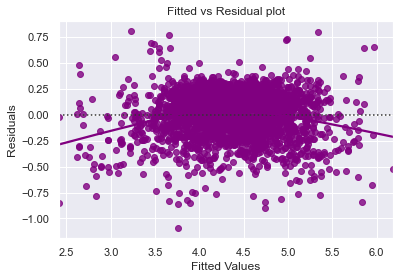

In [62]:
sns.residplot(
    data = df_pred, x = 'Fitted Values', y = 'Residuals', color = 'purple', lowess = True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual plot')
plt.show()

### Observation
There is no pattern in the plot. Therefore the assumptions of linearity and independence are satisfied 

### Test for Normality

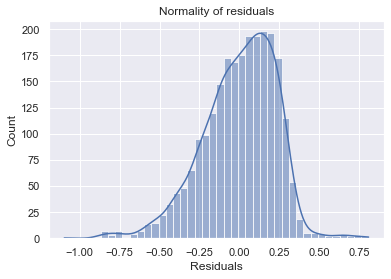

In [63]:
sns.histplot(data = df_pred, x = 'Residuals', kde = True)
plt.title('Normality of residuals')
plt.show()

### Observation
The histogram of the residual is near to a bell shape. and a bit sqewed to the right

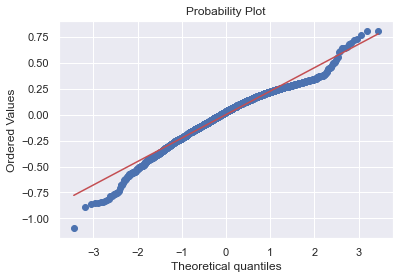

In [59]:
import pylab
import scipy. stats as stats
stats.probplot(df_pred['Residuals'], dist = 'norm', plot = pylab)
plt.show()

### Observation
It can be seen that the residual more or less follow a normal distribution with the exception of the neck and tail

In [78]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9730069041252136, pvalue=5.921526299635352e-21)

### Observation
* since the p-value is more than 5%, the residuals are normal as per the shapiro  model.
* Therefore the assumption is not satisfied

### TEST FOR HOMOSCEDASTICITY

In [85]:
name = ['F statistic', 'p_value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train3)
lzip(name,test)

[('F statistic', 1.0240723892352468), ('p_value', 0.34130322182245126)]

### Predictions on test data

In [86]:
pred = olsmod2.predict(x_test3)
df_pred_test = pd.DataFrame({'Actual': y_test, 'predicted': pred})
df_pred_test.sample(10, random_state = 1)

,Actual,predicted
1995,4.566741,4.401257
2341,3.696103,3.982022
1913,3.592093,3.635527
688,4.306495,4.134227
650,4.522115,5.161122
2291,4.259294,4.369888
40,4.997685,5.426711
1884,3.875359,4.074385
2538,4.206631,4.035965
45,5.380450,5.252246


## Final Model Summary

In [64]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [65]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     507.1
Date:                   Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                           23:24:38   Log-Likelihood:                 136.95
No. Observations:                   2417   AIC:                            -219.9
Df Residuals:                       2390   BIC:                            -63.56
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
ma

In [101]:
# checking model performance on train set(0.7 data)

print('Training Performance\n')
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228642,0.180697,0.846558,0.844823,4.320475


In [66]:
# checking model performance on test set (0.3 data)

print('Test Performance\n')
olsmodel_final_test_pref = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_pref

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243259,0.187517,0.835935,0.831544,4.575728


### Actionable Insights 


- The training R square is 0.846, therefore the model is not underfitting
- The train and test RMSE and MAE are comparable therefore he model is not overfitting as well.
- The mean error of 0.187 predict that the project is within range.
- MAPE of 4.57 on the test data means that we able to predict within 4.57% of the project 


### Recommendations 
* Since there are alot of outliers, we have to paymuch attension to the data.
* We will recommend that batteries made should be less heavilier 
* We will again recommend that the Ram size should be bigger enough to make the phones effective in usage.

___